<a href="https://colab.research.google.com/github/ranjanguddu/Machine-Learning/blob/master/EVA4/Session-10/Assignment-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# let's mount our google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/EVA4_Assignment/')

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

In [2]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [3]:
# calculation of mean and standard deviation
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in train: # to show the prgress bar put tqdm_notebook(train) instead of (train)
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print("Statistics of the datset is :- \nMean:{}\nStandard Deviation: {}".format(mu,std))

Statistics of the datset is :- 
Mean:[0.49139968 0.48215841 0.44653091]
Standard Deviation: [0.24703223 0.24348513 0.26158784]


In [0]:
from Albumentation_Process import Albumentations

channel_means = mu
channel_stdevs = std
norm_mean_std=[channel_means,channel_stdevs]
# Train Phase transformations
train_transforms = Albumentations(norm_mean_std,Rotate=(-30.0,30.0),HorizontalFlip=True,cutout=(4,))

# Test Phase transformations
test_transforms = Albumentations(norm_mean_std)

In [5]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import DataLoaders

loader = DataLoaders.DataLoader()

# train dataloader
train_loader = loader.load(train)

# test dataloader
test_loader = loader.load(test)

In [0]:
channel_means = mu
channel_stdevs = std
def unnormalize(img):
  #print("unnormalized function get called. \n Shape of the Image is:{} \n Dimension of the Image is:{}".format(img.shape, img.ndimension()))
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


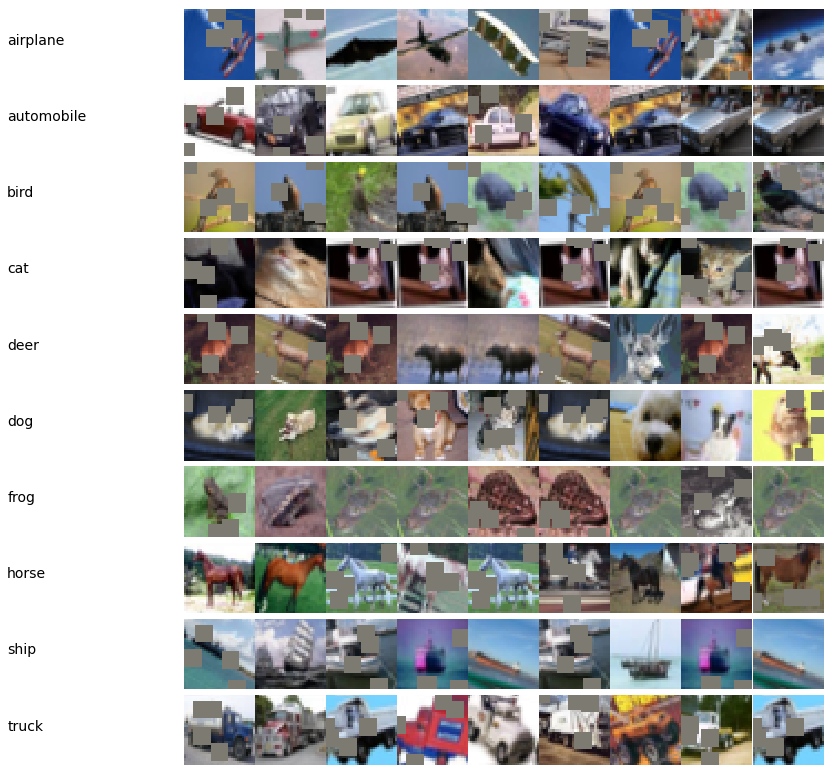

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

r, c = 10, 11
n = 9
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)

for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)

      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [12]:
from Edited_ResNet import ResNet18
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = ResNet18()
use_cuda = torch.cuda.is_available()
model.device = "cuda"
model.to(model.device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


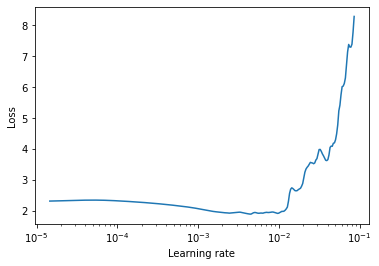

In [12]:
from LR_Finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, val_loader=test_loader, start_lr=1e-5, end_lr=2, num_iter=len(train_loader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [13]:
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
print("Best Loss: %s\nBest Learning Rate: %s" % (best_loss, best_lr))
lr = best_lr

Best Loss: 1.883861331473238
Best Learning Rate: 0.004402873289885709


In [13]:
from Train_the_Model import train
from Test_the_Model import test
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time

Epochs = 50
lr=0.004402873289885709


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3, verbose=True, min_lr=1e-5)

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  train_losses = []
  train_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(Epochs):
      t0=time.time()
      print("EPOCH:", epoch+1)
      train(model, device,train_loader, criterion, optimizer, epoch, l1_decay,l2_decay, train_losses, train_accs)
      test(model, device, test_loader, criterion, class_names, test_losses, test_accs)
      scheduler.step(test_losses[-1])
      t1= time.time()
      print("Time taken in epoch {} is {:.2f}\n".format(epoch+1, (t1-t0)))
  return train_losses, train_accs, test_losses, test_accs

# train and test the model
train_losses, train_accs, test_losses, test_accs = run(l1_decay=0, l2_decay=0)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0566484928131104 Batch_id=390 Accuracy=46.68: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 5653/10000 (56.53%)

Time taken in epoch 1 is 65.27

EPOCH: 2


Loss=0.7450282573699951 Batch_id=390 Accuracy=61.52: 100%|██████████| 391/391 [01:02<00:00,  6.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 6562/10000 (65.62%)

Time taken in epoch 2 is 65.60

EPOCH: 3


Loss=0.958663821220398 Batch_id=390 Accuracy=68.73: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7367/10000 (73.67%)

Time taken in epoch 3 is 65.92

EPOCH: 4


Loss=0.9199054837226868 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7417/10000 (74.17%)

Time taken in epoch 4 is 66.27

EPOCH: 5


Loss=0.5691070556640625 Batch_id=390 Accuracy=75.99: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7948/10000 (79.48%)

Time taken in epoch 5 is 66.42

EPOCH: 6


Loss=0.48735755681991577 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8030/10000 (80.30%)

Time taken in epoch 6 is 66.44

EPOCH: 7


Loss=0.7490543127059937 Batch_id=390 Accuracy=80.09: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8124/10000 (81.24%)

Time taken in epoch 7 is 66.52

EPOCH: 8


Loss=0.7281416058540344 Batch_id=390 Accuracy=81.16: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8270/10000 (82.70%)

Time taken in epoch 8 is 66.41

EPOCH: 9


Loss=0.7192341685295105 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8243/10000 (82.43%)

Time taken in epoch 9 is 66.35

EPOCH: 10


Loss=0.3786936104297638 Batch_id=390 Accuracy=83.74: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8480/10000 (84.80%)

Time taken in epoch 10 is 66.10

EPOCH: 11


Loss=0.4311138093471527 Batch_id=390 Accuracy=84.82: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 8032/10000 (80.32%)

Time taken in epoch 11 is 66.15

EPOCH: 12


Loss=0.2953692078590393 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8333/10000 (83.33%)

Time taken in epoch 12 is 66.17

EPOCH: 13


Loss=0.17975588142871857 Batch_id=390 Accuracy=86.40: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8497/10000 (84.97%)

Time taken in epoch 13 is 66.07

EPOCH: 14


Loss=0.39561474323272705 Batch_id=390 Accuracy=86.86: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8659/10000 (86.59%)

Time taken in epoch 14 is 66.08

EPOCH: 15


Loss=0.3534528613090515 Batch_id=390 Accuracy=87.79: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8562/10000 (85.62%)

Time taken in epoch 15 is 66.27

EPOCH: 16


Loss=0.42745476961135864 Batch_id=390 Accuracy=88.11: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8616/10000 (86.16%)

Time taken in epoch 16 is 66.11

EPOCH: 17


Loss=0.2786621153354645 Batch_id=390 Accuracy=88.88: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8681/10000 (86.81%)

Time taken in epoch 17 is 66.10

EPOCH: 18


Loss=0.20103783905506134 Batch_id=390 Accuracy=89.27: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8648/10000 (86.48%)

Time taken in epoch 18 is 66.16

EPOCH: 19


Loss=0.3034009039402008 Batch_id=390 Accuracy=89.80: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8728/10000 (87.28%)

Time taken in epoch 19 is 66.25

EPOCH: 20


Loss=0.36395710706710815 Batch_id=390 Accuracy=89.94: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8623/10000 (86.23%)

Time taken in epoch 20 is 66.21

EPOCH: 21


Loss=0.3157736659049988 Batch_id=390 Accuracy=90.57: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 8770/10000 (87.70%)

Time taken in epoch 21 is 66.14

EPOCH: 22


Loss=0.45110923051834106 Batch_id=390 Accuracy=90.86: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8745/10000 (87.45%)

Time taken in epoch 22 is 66.23

EPOCH: 23


Loss=0.2716065049171448 Batch_id=390 Accuracy=91.21: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8693/10000 (86.93%)

Time taken in epoch 23 is 66.19

EPOCH: 24


Loss=0.20050378143787384 Batch_id=390 Accuracy=91.83: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8751/10000 (87.51%)

Time taken in epoch 24 is 66.00

EPOCH: 25


Loss=0.23205778002738953 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8766/10000 (87.66%)

Epoch    25: reducing learning rate of group 0 to 4.4029e-04.
Time taken in epoch 25 is 65.96

EPOCH: 26


Loss=0.16605517268180847 Batch_id=390 Accuracy=94.32: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9040/10000 (90.40%)

Time taken in epoch 26 is 66.08

EPOCH: 27


Loss=0.2636670470237732 Batch_id=390 Accuracy=94.71: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9053/10000 (90.53%)

Time taken in epoch 27 is 66.21

EPOCH: 28


Loss=0.14089342951774597 Batch_id=390 Accuracy=95.06: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9064/10000 (90.64%)

Time taken in epoch 28 is 66.10

EPOCH: 29


Loss=0.2017120122909546 Batch_id=390 Accuracy=95.33: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9077/10000 (90.77%)

Time taken in epoch 29 is 65.99

EPOCH: 30


Loss=0.11374678462743759 Batch_id=390 Accuracy=95.37: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9099/10000 (90.99%)

Time taken in epoch 30 is 65.88

EPOCH: 31


Loss=0.10799535363912582 Batch_id=390 Accuracy=95.65: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9096/10000 (90.96%)

Time taken in epoch 31 is 66.26

EPOCH: 32


Loss=0.14212486147880554 Batch_id=390 Accuracy=95.71: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9078/10000 (90.78%)

Time taken in epoch 32 is 66.37

EPOCH: 33


Loss=0.06908632069826126 Batch_id=390 Accuracy=95.71: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9102/10000 (91.02%)

Time taken in epoch 33 is 66.15

EPOCH: 34


Loss=0.12303422391414642 Batch_id=390 Accuracy=95.90: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9119/10000 (91.19%)

Epoch    34: reducing learning rate of group 0 to 4.4029e-05.
Time taken in epoch 34 is 66.04

EPOCH: 35


Loss=0.06919097900390625 Batch_id=390 Accuracy=95.92: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9123/10000 (91.23%)

Time taken in epoch 35 is 66.00

EPOCH: 36


Loss=0.13703635334968567 Batch_id=390 Accuracy=96.03: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9111/10000 (91.11%)

Time taken in epoch 36 is 65.99

EPOCH: 37


Loss=0.13395968079566956 Batch_id=390 Accuracy=95.95: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9112/10000 (91.12%)

Time taken in epoch 37 is 66.17

EPOCH: 38


Loss=0.14042750000953674 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9117/10000 (91.17%)

Time taken in epoch 38 is 66.34

EPOCH: 39


Loss=0.17430062592029572 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9112/10000 (91.12%)

Time taken in epoch 39 is 66.07

EPOCH: 40


Loss=0.09397812187671661 Batch_id=390 Accuracy=96.20: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9115/10000 (91.15%)

Time taken in epoch 40 is 65.82

EPOCH: 41


Loss=0.0779164507985115 Batch_id=390 Accuracy=96.08: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9114/10000 (91.14%)

Time taken in epoch 41 is 66.02

EPOCH: 42


Loss=0.05020538717508316 Batch_id=390 Accuracy=96.16: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9130/10000 (91.30%)

Epoch    42: reducing learning rate of group 0 to 1.0000e-05.
Time taken in epoch 42 is 66.10

EPOCH: 43


Loss=0.16572894155979156 Batch_id=390 Accuracy=96.18: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9123/10000 (91.23%)

Time taken in epoch 43 is 66.13

EPOCH: 44


Loss=0.2658455967903137 Batch_id=390 Accuracy=95.99: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9126/10000 (91.26%)

Time taken in epoch 44 is 66.09

EPOCH: 45


Loss=0.0713786855340004 Batch_id=390 Accuracy=96.20: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9108/10000 (91.08%)

Time taken in epoch 45 is 66.02

EPOCH: 46


Loss=0.07608891278505325 Batch_id=390 Accuracy=96.20: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9122/10000 (91.22%)

Time taken in epoch 46 is 66.17

EPOCH: 47


Loss=0.21019944548606873 Batch_id=390 Accuracy=96.18: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9118/10000 (91.18%)

Time taken in epoch 47 is 66.19

EPOCH: 48


Loss=0.03739556670188904 Batch_id=390 Accuracy=96.07: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9122/10000 (91.22%)

Time taken in epoch 48 is 66.16

EPOCH: 49


Loss=0.12098340690135956 Batch_id=390 Accuracy=96.22: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9114/10000 (91.14%)

Time taken in epoch 49 is 66.36

EPOCH: 50


Loss=0.1095072403550148 Batch_id=390 Accuracy=96.16: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]


Test set: Average loss: 0.0023, Accuracy: 9118/10000 (91.18%)

Time taken in epoch 50 is 66.12



In [0]:
torch.save(model.state_dict(), 'Model_Saved.pt')

In [19]:
misclassified_imgs=[]
correct_imgs=[]


with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            is_correct = pred.eq(target.view_as(pred))
            misclassified_inds = (is_correct==0).nonzero()[:,0]
            for mis_ind in misclassified_inds:
              if len(misclassified_imgs) == 25:
                break
              misclassified_imgs.append({"target": target[mis_ind].cpu().numpy(),"pred": pred[mis_ind][0].cpu().numpy(),"img": data[mis_ind]})
              
            correct_inds = (is_correct==1).nonzero()[:,0]
            for ind in correct_inds:
              if len(correct_imgs) == 25:
                break
              correct_imgs.append({"target": target[ind].cpu().numpy(),"pred": pred[ind][0].cpu().numpy(),"img": data[ind]})
        print("No. of misclassified items: {} \n No. of correctly classified item is:{}".format(len(misclassified_imgs),len(correct_imgs)))
        print(type(misclassified_imgs[0]))

No. of misclassified items: 25 
 No. of correctly classified item is:25
<class 'dict'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


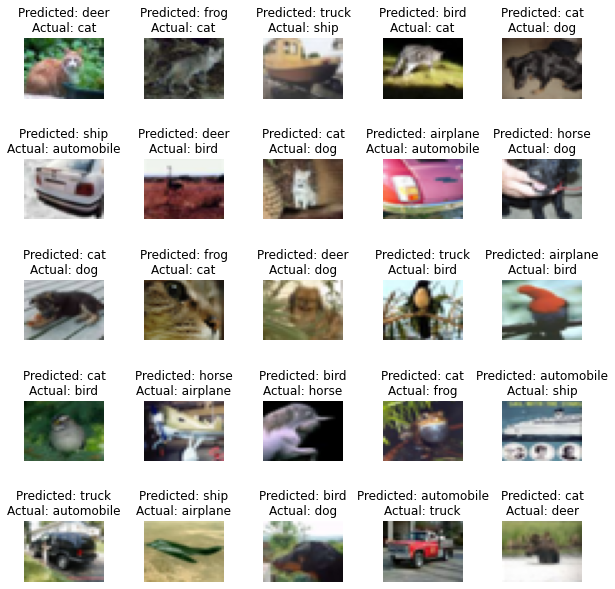

In [20]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

#fig = plt.figure(figsize=(4,4))
#fig.subplots_adjust(hspace=0.01, wspace=0.01)
figure = plt.figure(figsize=(10, 10))
figure.subplots_adjust(hspace=1, wspace=0.5)
for i in range(25):
  data = misclassified_imgs[i].get("img")
  t = (misclassified_imgs[i].get("target"))
  p = (misclassified_imgs[i].get("pred")) 
  #data, t, p = misclassified_imgs[i]
  d=data.cpu()
  plt.subplot(5,5,i+1)
  plt.imshow(unnormalize(d), aspect='auto')
  pyplot.axis("off")
  #plt.title("A:"+class_names[t]+"\n"+"P:"+class_names[p])
  plt.title("Predicted: %s\nActual: %s" % (class_names[p], class_names[t]))
  plt.xticks([])
  plt.yticks([])
  
#pyplot.subplots_adjust(hspace=1, wspace=0.2)  
plt.show()

In [0]:
def plot_graph(data, metric):
    fig, ax = plt.subplots()

    for sub_metric in data.keys():
      ax.plot(data[sub_metric], label=sub_metric)
    
    #plt.title(f'Change in %s' % (metric))
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    
    ax.legend()
    plt.show()

    fig.savefig(f'%s_change.png' % (metric.lower()))

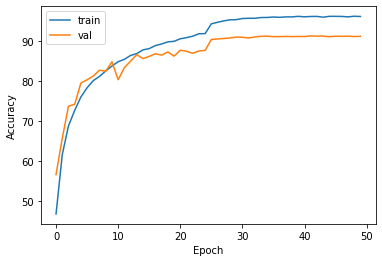

In [16]:
plt_data = {
    "train": train_accs,
    "val": test_accs
}
plot_graph(plt_data, "Accuracy")

In [0]:
from visualize_v2 import VisualizeCam

target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,class_names, target_layers)

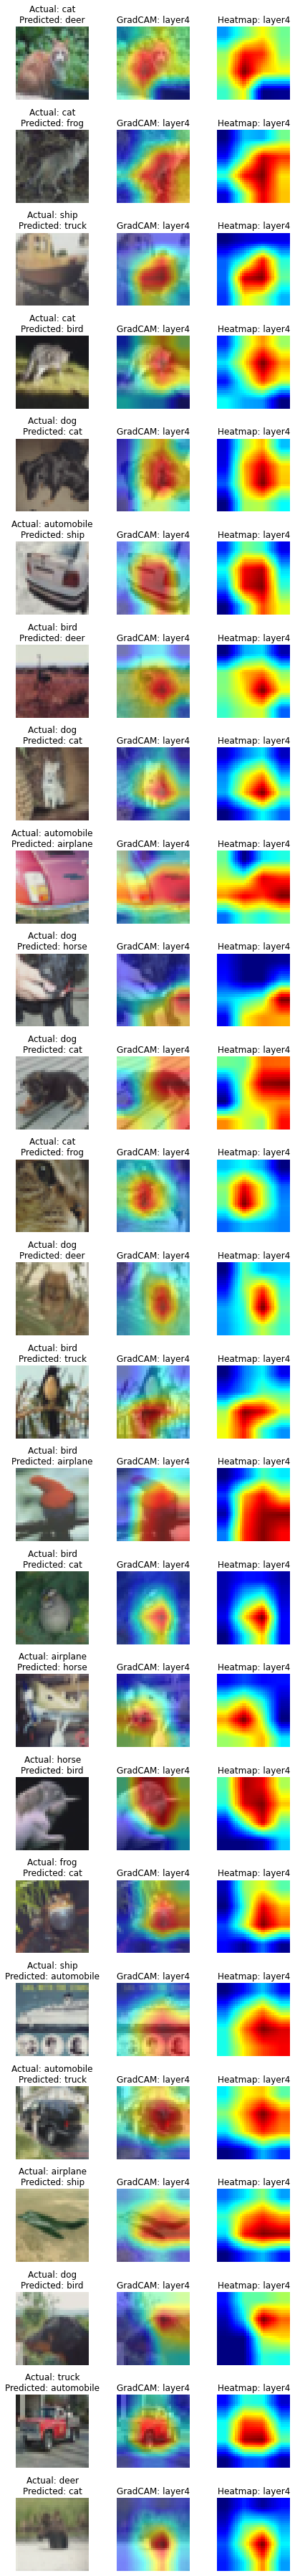

In [21]:
num_img = 25
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect", per_image=False)
